In [1]:
import torch
import numpy
import matplotlib.pyplot as plt

##Formulation of the $\beta^0_+(x)$ splines (CPWC Basis)
------------

$\beta^0_+(\mathbf{x}) = \begin{cases}
    1,& \text{if } 0\leq \mathbf{x}\leq 1\\
    0,              & \text{otherwise}
\end{cases}$

The Fourier transform of the given b-spline can be seen below:

$\hat{\beta^0}_+(\mathbf{f}) = \begin{cases}
    \text{sinc}{(\mathbf{f})}e^{-j\pi \mathbf{f}},& \text{if } 0\leq \mathbf{x}\leq 1\\
    0,              & \text{otherwise}
\end{cases}$

The function and its Fourier Transform can be seen below:


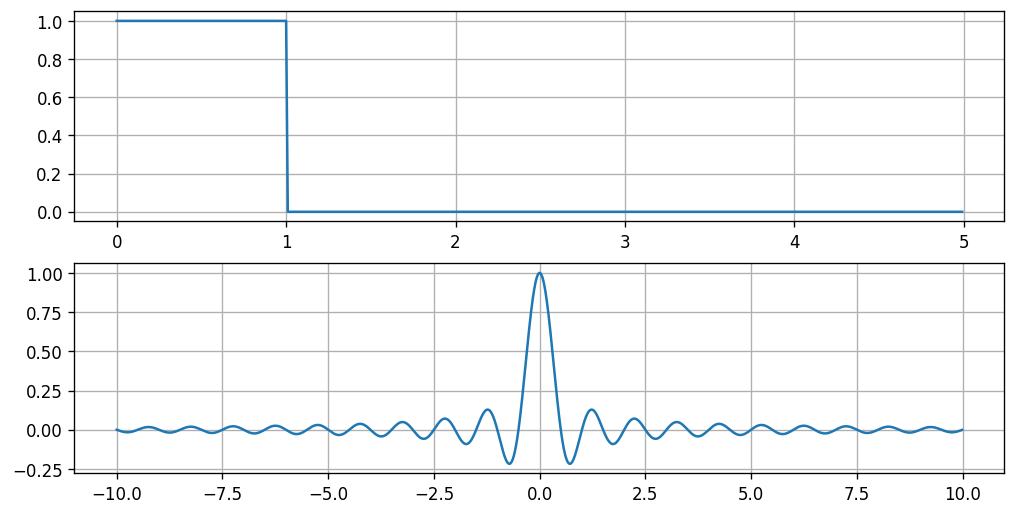

In [2]:
t = torch.arange(0,5,0.01)
b = torch.zeros(size = t.shape)
b[t<=1] = 1

plt.figure(dpi = 120,figsize = (10,5))
plt.subplot(2,1,1)
plt.plot(t,b)
plt.grid()

plt.subplot(2,1,2)
f = torch.arange(-10,10,0.01)
B = torch.sinc(f)*torch.cos(torch.pi*f)
plt.plot(f,B)
plt.grid()
plt.show()

For the 2 dimensional setting can be seen below:


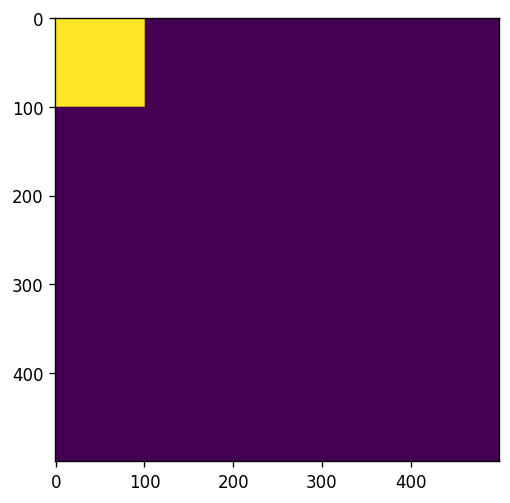

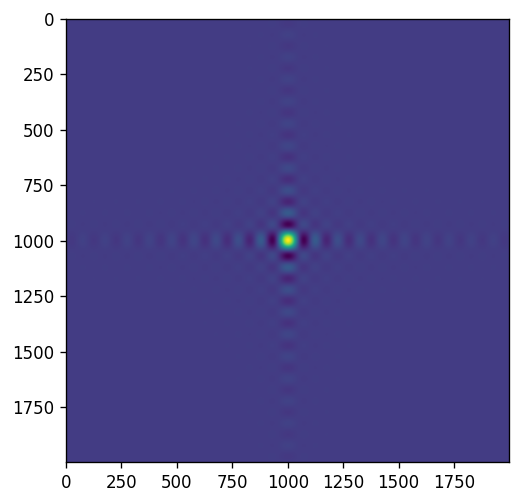

In [6]:
t = torch.arange(0,5,0.01)
tx,ty = torch.meshgrid(t,t)
b = torch.zeros(size = tx.shape)
b[(tx<=1) & (ty<=1)] = 1

plt.figure(dpi = 120)
plt.imshow(b.numpy())
plt.show()

plt.figure(dpi = 120)
f = torch.arange(-10,10,0.01)
B = torch.sinc(f)*torch.cos(torch.pi*f)
M = torch.outer(B,B)
plt.imshow(M.numpy())
plt.show()

Defining the downscaling and upscaling operations for the b-splines

$\beta^0_+(\mathbf{x}/2) = \sqrt{2} \sum_{\mathbf{k} \in \mathbb{Z}^2} h^0(\mathbf{k}) \beta^0_+(\mathbf{x} - \mathbf{k}),
$

The finite filter $h^0(k)$ can be defined as the following:

$h^0(\mathbf{k}) =  \leftrightarrow H^0(\mathbf{z}) = \sqrt{2} \cdot \left(\frac{1 + \mathbf{z}^{-1}}{2}\right).
$

Then;


$h^0(k_1, k_2) =
\begin{bmatrix}
\fbox{1} & 1 \\
1 & 1
\end{bmatrix}.
$

By editing the first equation:

$\beta^0_+(\mathbf{x}/2) = \sum_{\mathbf{k} \in \mathbb{Z}^2} h'^0(\mathbf{k}) \beta^0_+(\mathbf{x} - \mathbf{k}),
$

where

$
h'^0(k_1, k_2) =
\begin{bmatrix}
\fbox{$\frac{\sqrt{2}}{2}$} & \frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}
\end{bmatrix}.
$